<a href="https://colab.research.google.com/github/iliab1/CustomerChurnPrediction/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Problem Statement: Predict whether a customer will churn or not.

Description: Churn is when a customer leaves a company. In this case, telecom provider. The dataset for this analysis is "Telco Customer Churn" from Kaggle and can be found [here](https://www.kaggle.com/blastchar/telco-customer-churn).

| Column Name       | Data Type | Description                                                                 |
|-------------------|-----------|-----------------------------------------------------------------------------|
| customerID        | object    | Customer ID                                                                 |
| gender            | object    | Whether the customer is male or female                                      |
| SeniorCitizen     | int64     | Whether the customer is a senior citizen or not (1: Yes, 0: No)             |
| Partner           | object    | Whether the customer has a partner or not (Yes, No)                         |
| Dependents        | object    | Whether the customer has dependents or not (Yes, No)                        |
| tenure            | int64     | Number of months the customer has stayed with the company                   |
| PhoneService      | object    | Whether the customer has phone service or not (Yes, No)                     |
| MultipleLines     | object    | Whether the customer has multiple lines (Yes, No, No phone service)         |
| InternetService   | object    | Customer’s internet service type (DSL, Fiber optic, No)                 |
| OnlineSecurity    | object    | Whether the customer has online security (Yes, No, No internet service)     |
| OnlineBackup      | object    | Whether the customer has online backup (Yes, No, No internet service)       |
| DeviceProtection  | object    | Whether the customer has device protection (Yes, No, No internet service)   |
| TechSupport       | object    | Whether the customer has tech support (Yes, No, No internet service)        |
| StreamingTV       | object    | Whether the customer has streaming TV (Yes, No, No internet service)        |
| StreamingMovies   | object    | Whether the customer has streaming movies (Yes, No, No internet service)    |
| Contract          | object    | The contract term of the customer (Month-to-month, One year, Two year)      |
| PaperlessBilling  | object    | Whether the customer has paperless billing or not (Yes, No)                 |
| PaymentMethod     | object    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges    | float64   | The amount charged to the customer monthly                                  |
| TotalCharges      | object    | The total amount charged to the customer                                    |
| Churn             | object    | Whether the customer churned or not (Yes or No)                             |


# 1. Dataset examination

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns # a visualisation library we have n
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning) # suppresses warning
# command below ensures matplotlib output can be included in Notebook
%matplotlib inline

# Load the dataset as a pandas DataFrame
dataset = pd.read_csv('/content/Telco-Customer-Churn.csv')

In [ ]:
# Display head
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Examine shape and datatypes
print(f'The dataset has a shape: {dataset.shape}\n')
print(f'The dataset contains the following data types: \n\n {dataset.dtypes}')

The dataset has a shape: (7043, 21)

The dataset contains the following data types: 

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


# 2. Pre-processing

In [ ]:
# Total Charges is an object, convert it to float
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')

# For the sake of readability, convert SeniorCitizen column values to Yes/No
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].astype(str).map({'0': 'No', '1': 'Yes'})

In [ ]:
# Check for missing values in the dataset and remove them
missing_values = dataset.isnull().sum()
if missing_values.sum() > 0:
    print(f'This dataset has {missing_values.sum()} missing values')
    print('Columns with missing values are:')
    for col in missing_values.index:
        if missing_values[col] > 0:
            print(f'{col}: {missing_values[col]}')
            dataset = dataset.dropna(subset=[col])
            print('Missing values have been removed from the dataset!')
else:
    print('The dataset has no missing values')

This dataset has 11 missing values
Columns with missing values are:
TotalCharges: 11
Missing values have been removed from the dataset!


In [ ]:
# Examine the unique values in every column and remove irrelevant columns
for column in dataset.columns:
    # If the column has equal number of unique values as the number of rows in the dataset, then it is irrelevant
    if len(dataset[column].unique()) == len(dataset):
        print(f'The column "{column}" has equal number of unique values to number rows in the dataset.')
        dataset = dataset.drop(column, axis=1)
        print('It has been removed from the dataset!')

The column "customerID" has equal number of unique values to number rows in the dataset.
It has been removed from the dataset!


In [ ]:
 # Replace "no interent service" and "No phone service" labels with "No"
columns_to_replace = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for column in columns_to_replace:
    dataset[column] = dataset[column].replace(['No phone service', 'No internet service'], 'No')
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Remove duplicated values
dup_num = dataset.duplicated().sum()

if dup_num > 0:
  print(f'This dataset has {dup_num} duplicated values')
  dataset.drop_duplicates(inplace=True)
  print("Duplicated values have been removed from the dataset!")
else:
  print('The dataset has no duplicated values')

This dataset has 22 duplicated values
Duplicated values have been removed from the dataset!


# 3. Data Exploration

In [ ]:
# Determine which variables are continuous and which are discrete
def guess_if_continuous(series, threshold=0.01):
    if pd.api.types.is_numeric_dtype(series):
        ratio_unique = series.nunique() / series.size
        if ratio_unique > threshold:
            return 'continuous'
        else:
            return 'discrete'
    else:
        return 'discrete'

# Lists to hold the names of continuous and discrete columns
continuous_columns = []
discrete_columns = []

# Iterate through the DataFrame columns to classify them
for column in dataset.columns:
    classification = guess_if_continuous(dataset[column])
    print(f"{column}: {classification}")
    if classification == 'continuous':
        continuous_columns.append(column)
    else:
        discrete_columns.append(column)

gender: discrete
SeniorCitizen: discrete
Partner: discrete
Dependents: discrete
tenure: continuous
PhoneService: discrete
MultipleLines: discrete
InternetService: discrete
OnlineSecurity: discrete
OnlineBackup: discrete
DeviceProtection: discrete
TechSupport: discrete
StreamingTV: discrete
StreamingMovies: discrete
Contract: discrete
PaperlessBilling: discrete
PaymentMethod: discrete
MonthlyCharges: continuous
TotalCharges: continuous
Churn: discrete


## Examine continuous features

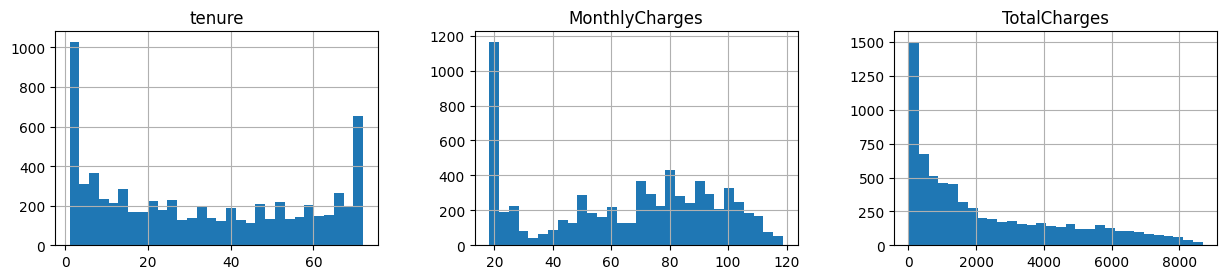

In [ ]:
# Plot the continuous variables to see their distributions
dataset[continuous_columns].hist(layout=(3,3), figsize=(15, 10), bins=30)
plt.show()

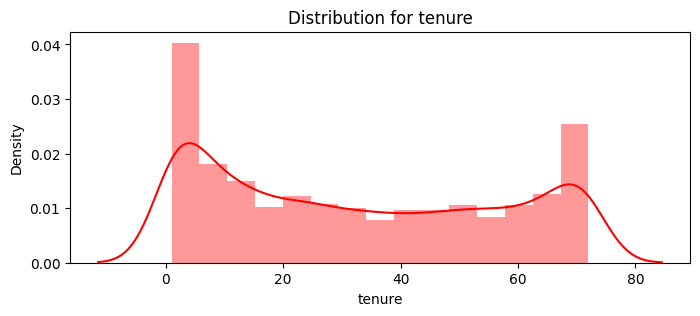

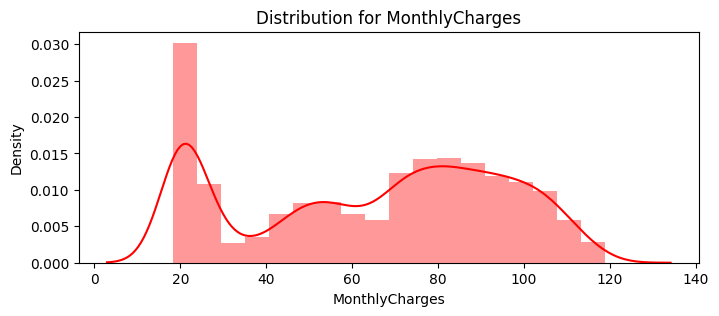

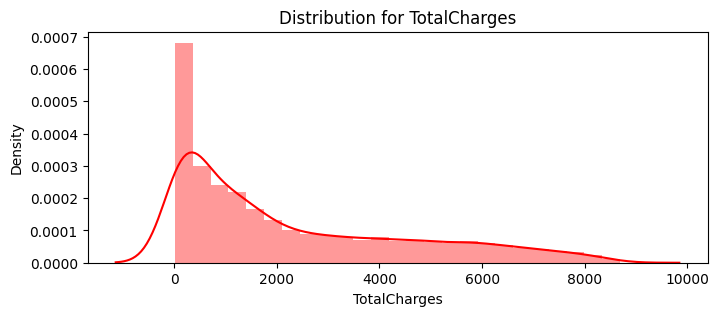

In [ ]:
# Kernel density estimate (KDE) plots
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)

# Plot for continuous columns
for feat in continuous_columns: distplot(feat, dataset)

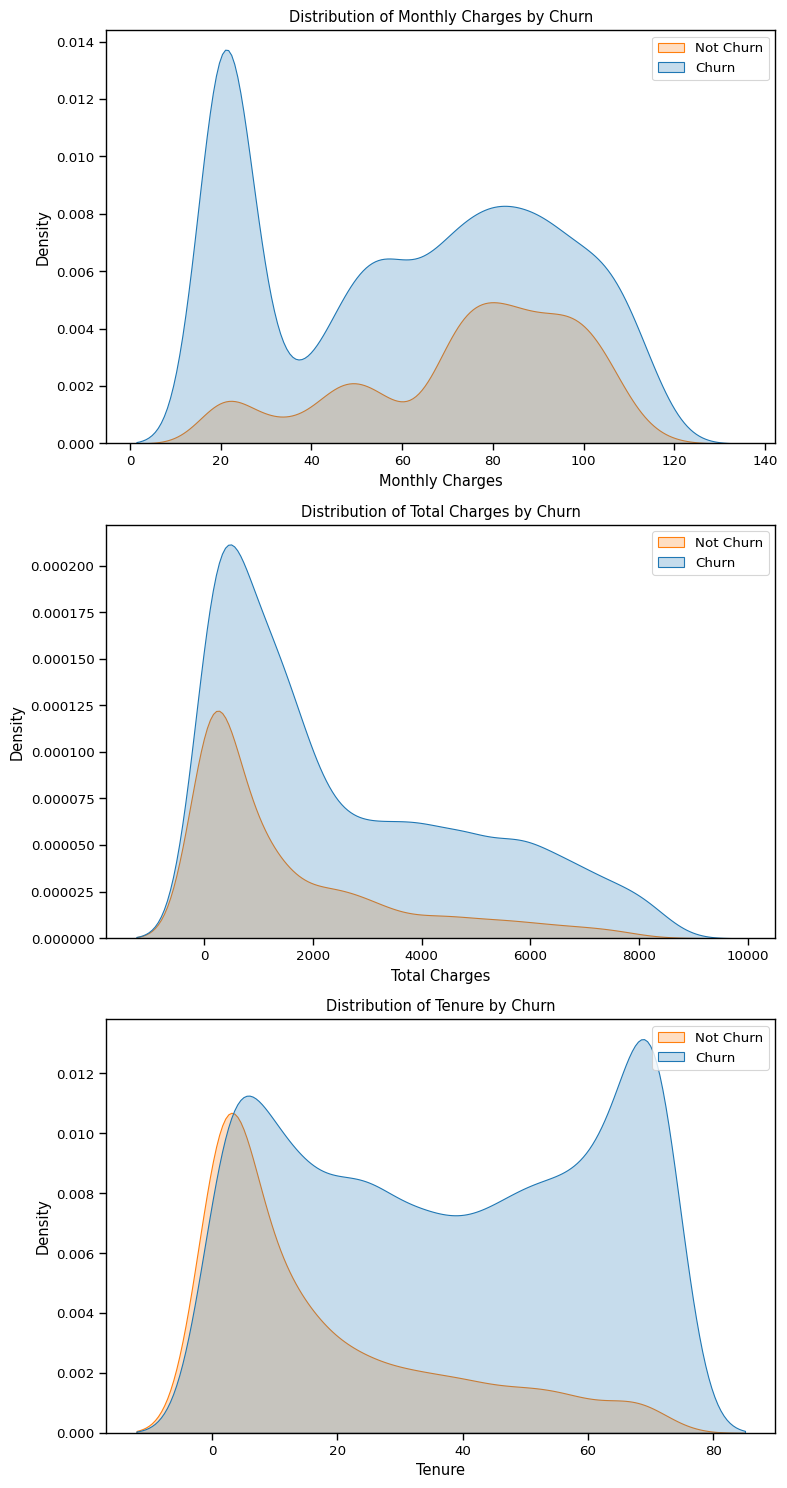

In [ ]:
sns.set_context("paper", font_scale=1.1)

# Create a figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Plot Monthly Charges by Churn
sns.kdeplot(data=dataset, x="MonthlyCharges", hue="Churn", fill=True, ax=axes[0])
axes[0].set_title('Distribution of Monthly Charges by Churn')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')
axes[0].legend(["Not Churn", "Churn"], loc='upper right')

# Plot Total Charges by Churn
sns.kdeplot(data=dataset, x="TotalCharges", hue="Churn", fill=True, ax=axes[1])
axes[1].set_title('Distribution of Total Charges by Churn')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')
axes[1].legend(["Not Churn", "Churn"], loc='upper right')

# Plot Tenure by Churn
sns.kdeplot(data=dataset, x="tenure", hue="Churn", fill=True, ax=axes[2])
axes[2].set_title('Distribution of Tenure by Churn')
axes[2].set_xlabel('Tenure')
axes[2].set_ylabel('Density')
axes[2].legend(["Not Churn", "Churn"], loc='upper right')


plt.tight_layout() # Adjust layout
plt.show() # Display the plots

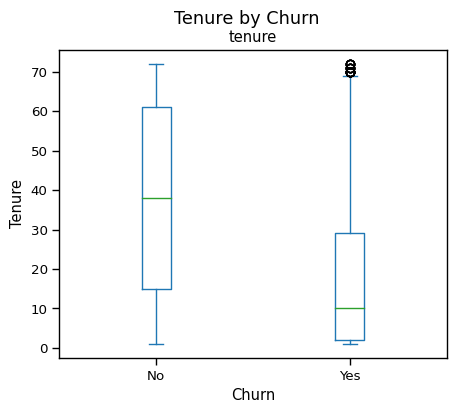

In [ ]:
dataset.plot(column="tenure", by='Churn', kind='box', subplots=False,
        xlabel='Churn', ylabel="Tenure",
        title="Tenure by Churn", figsize=(5, 4))
plt.xlabel('Churn')
plt.show()

## Examine categorical/discrete features

In [ ]:
# Check distributions
for column in discrete_columns:
  print(f"Normalized value counts for {column}:")
  print(dataset.value_counts(column, normalize=True))

Normalized value counts for gender:
gender
Male      0.50428
Female    0.49572
dtype: float64
Normalized value counts for SeniorCitizen:
SeniorCitizen
No     0.837233
Yes    0.162767
dtype: float64
Normalized value counts for Partner:
Partner
No     0.515977
Yes    0.484023
dtype: float64
Normalized value counts for Dependents:
Dependents
No     0.700571
Yes    0.299429
dtype: float64
Normalized value counts for PhoneService:
PhoneService
Yes    0.902996
No     0.097004
dtype: float64
Normalized value counts for MultipleLines:
MultipleLines
No     0.576748
Yes    0.423252
dtype: float64
Normalized value counts for InternetService:
InternetService
Fiber optic    0.440799
DSL            0.344365
No             0.214836
dtype: float64
Normalized value counts for OnlineSecurity:
OnlineSecurity
No     0.712553
Yes    0.287447
dtype: float64
Normalized value counts for OnlineBackup:
OnlineBackup
No     0.654066
Yes    0.345934
dtype: float64
Normalized value counts for DeviceProtection:
Devi

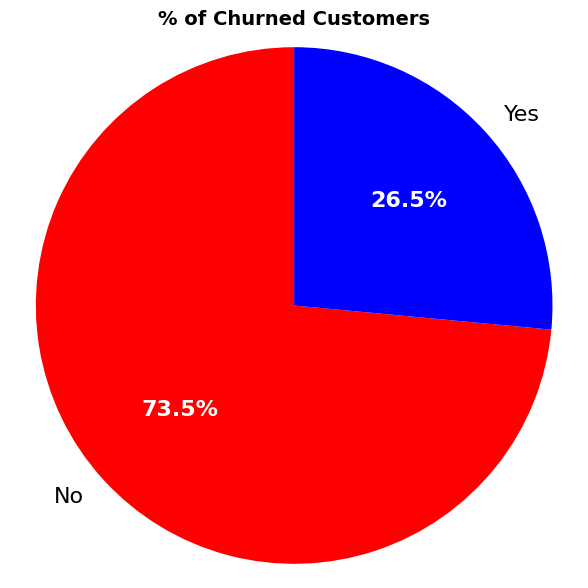

In [ ]:
churn_percentage = dataset.value_counts(dataset['Churn'], normalize=True)

fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the size for better visibility
colors = ['red', 'blue']
wedges, texts, autotexts = ax.pie(churn_percentage, labels=['No', 'Yes'], autopct='%.1f%%', startangle=90, colors=colors, textprops={'fontsize': 16})

# For Text redability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

ax.set_title('% of Churned Customers', fontsize=14, fontweight='bold') # Title Text
ax.axis('equal') # Equal aspect ratio

plt.tight_layout()
plt.show() # Display the chart

### How Demographics affect Churn

Text(0.5, 0.98, 'Churn Analysis by Customer Demographics')

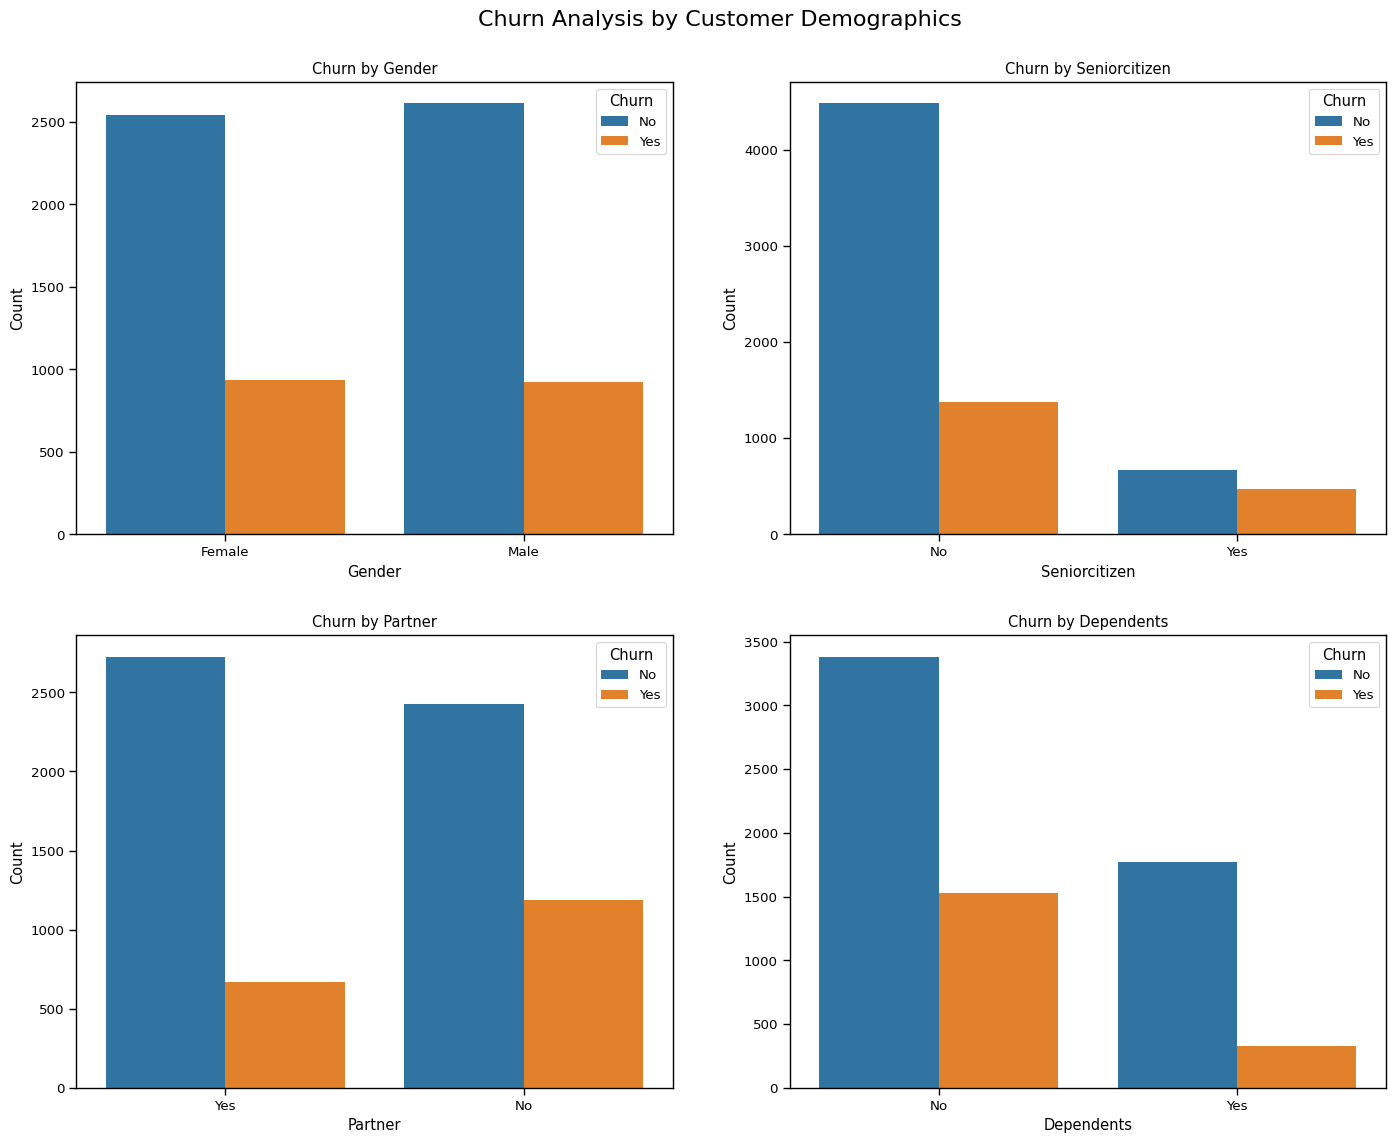

In [ ]:
services = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.tight_layout(pad=5.0)  # Add padding between plots for clarity

for i, item in enumerate(services):
    # Calculate row and column index
    row = i // 2
    col = i % 2

    # Create a countplot for each service with hue set to 'Churn'
    # Assuming 'dataset' is your DataFrame and it has a 'Churn' column
    ax = sns.countplot(x=item, hue='Churn', data=dataset, ax=axes[row, col])
    ax.set_title(f'Churn by {item.capitalize()}')
    ax.set_xlabel(item.capitalize())
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='upper right')

# Adjust the layout
plt.subplots_adjust(top=0.92)
fig.suptitle('Churn Analysis by Customer Demographics', fontsize=16)

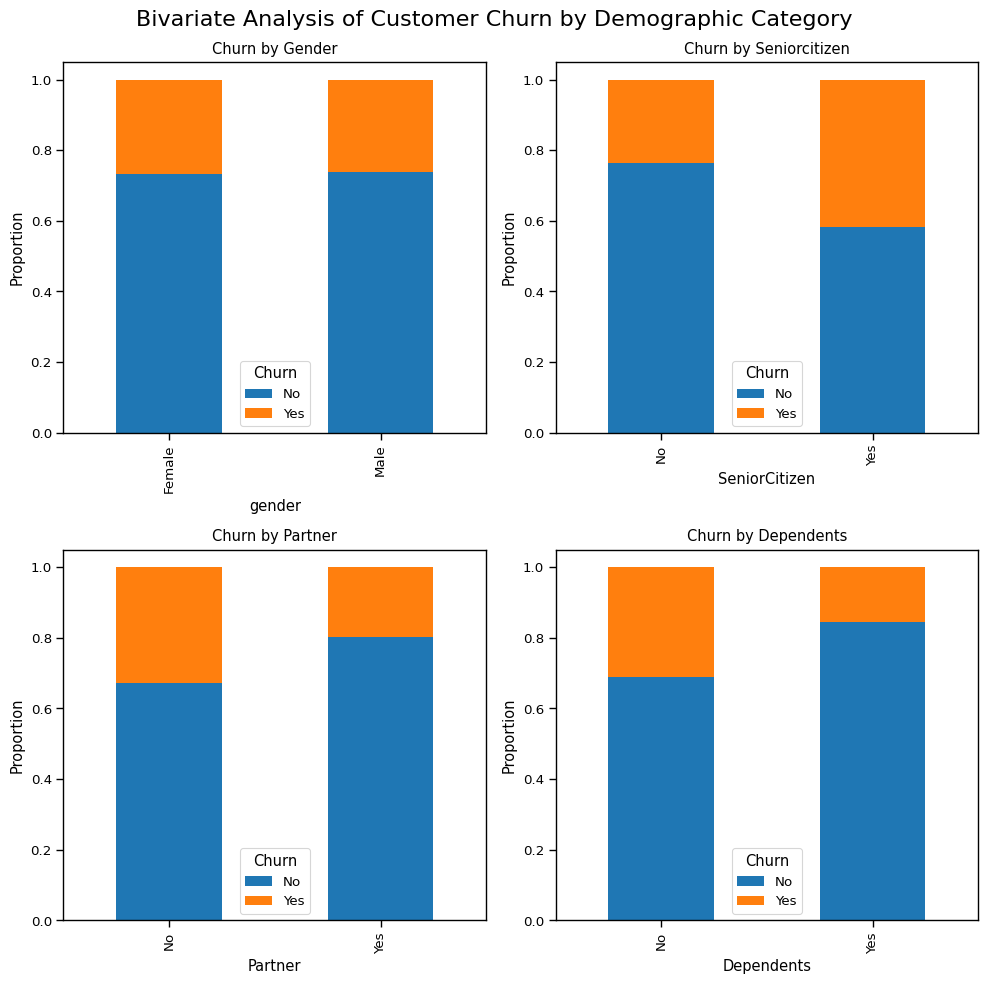

In [ ]:
# Bivariate Analysis
categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))  # Adjust the figsize and layout to 2x2

fig.suptitle('Bivariate Analysis of Customer Churn by Demographic Category', fontsize=16)
for i, category in enumerate(categories):
    # Calculate cross-tabulation
    crosstab = pd.crosstab(dataset[category], dataset['Churn'])

    # Normalize the counts
    crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)

    # Determine the position of the current plot
    row, col = divmod(i, 2)

    # Plot
    crosstab_normalized.plot(kind="bar", stacked=True, ax=axes[row, col])
    axes[row, col].set_title(f'Churn by {category.capitalize()}')
    axes[row, col].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

### How Contract Types affect Churn

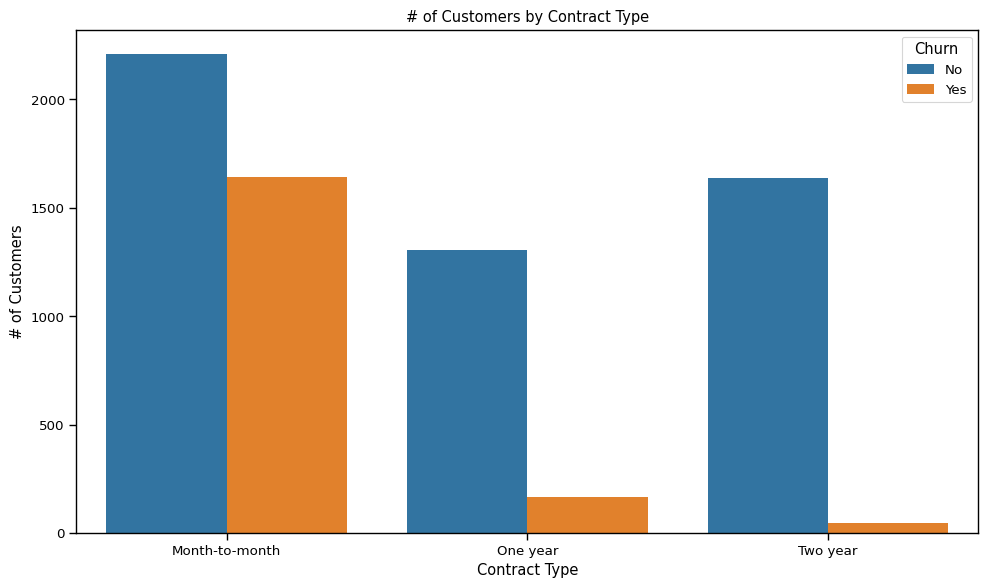

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the number of customers by Contract Type, differentiated by Churn
ax = sns.countplot(x='Contract', hue='Churn', data=dataset)

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Contract Type')
ax.set_title('# of Customers by Contract Type')
ax.legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

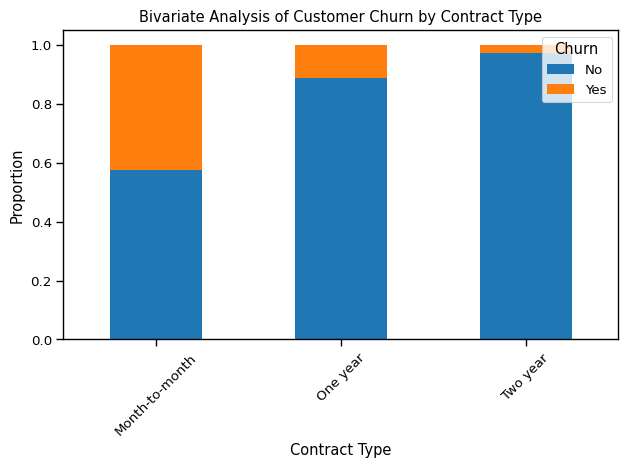

In [ ]:
# Calculate cross-tabulation
crosstab = pd.crosstab(dataset['Contract'], dataset['Churn'])

# Normalize the counts to get the proportion of 'Yes' and 'No' in 'Churn' for each payment method
crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)

# Plotting the normalized crosstab as a stacked bar chart
plt.figure(figsize=(10, 10))
crosstab_normalized.plot(kind="bar", stacked=True)  # Adjust colors as needed
plt.title('Bivariate Analysis of Customer Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

### How Services affect Churn

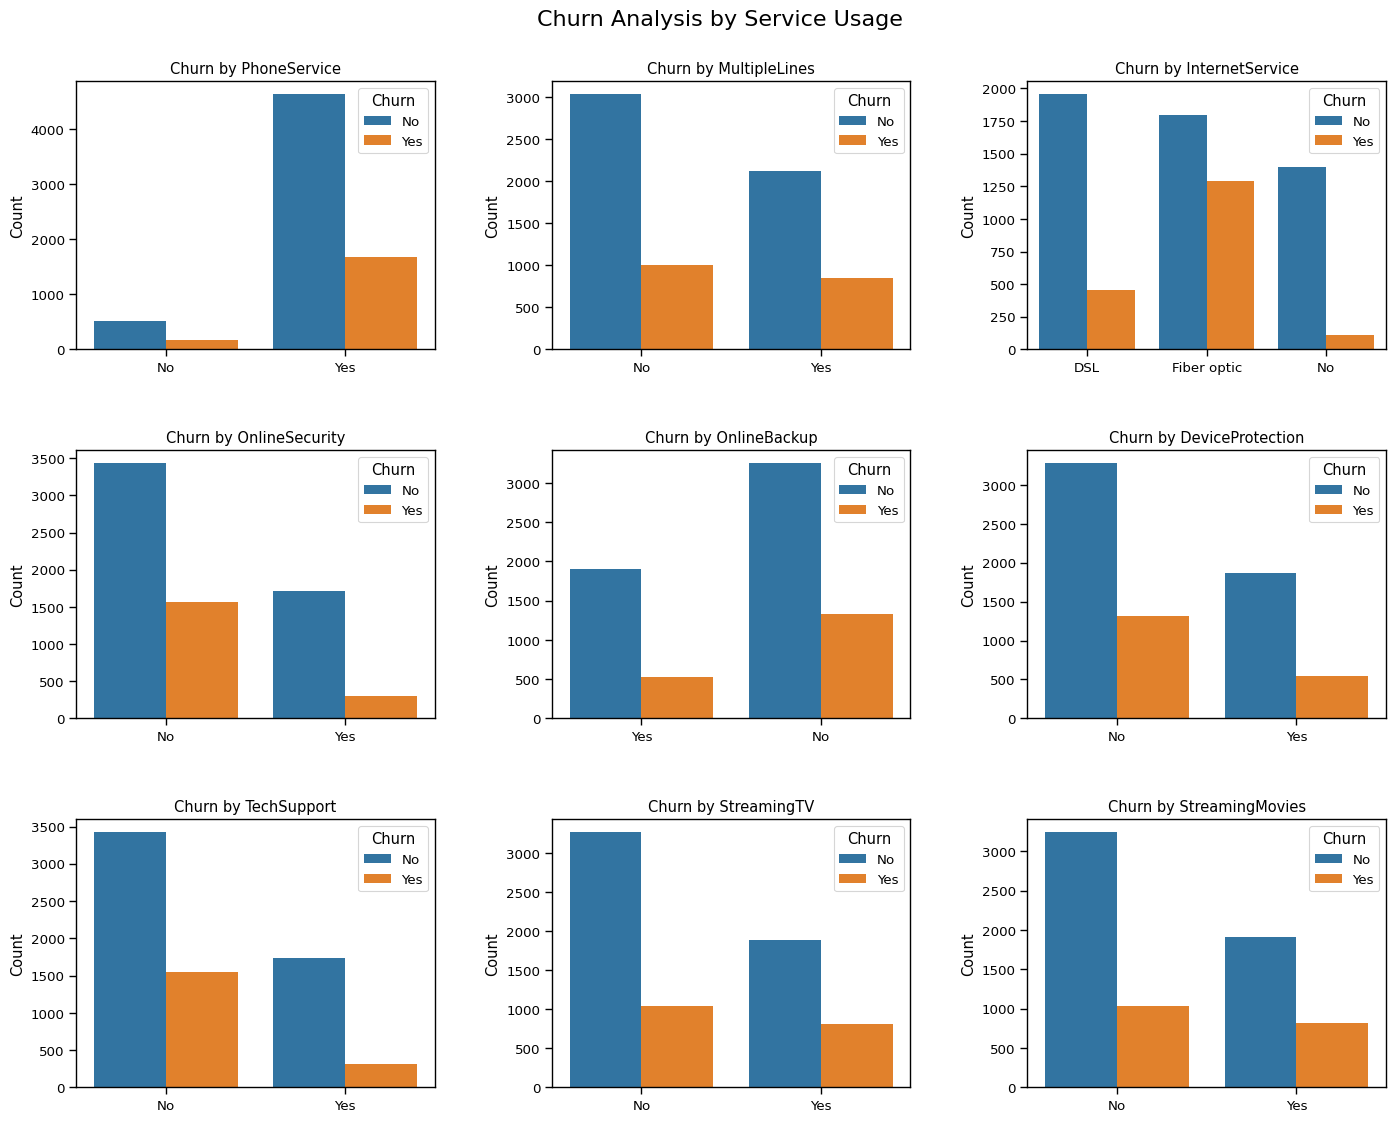

In [ ]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.tight_layout(pad=5.0) # Padding between graphs

for i, item in enumerate(services):
    row = i // 3
    col = i % 3
    ax = sns.countplot(x=item, hue='Churn', data=dataset, ax=axes[row, col])
    ax.set_title(f'Churn by {item}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.legend(title='Churn', loc='best')

plt.subplots_adjust(top=0.92)
fig.suptitle('Churn Analysis by Service Usage', fontsize=16)
plt.show()

### How Payment Methods affect Churn

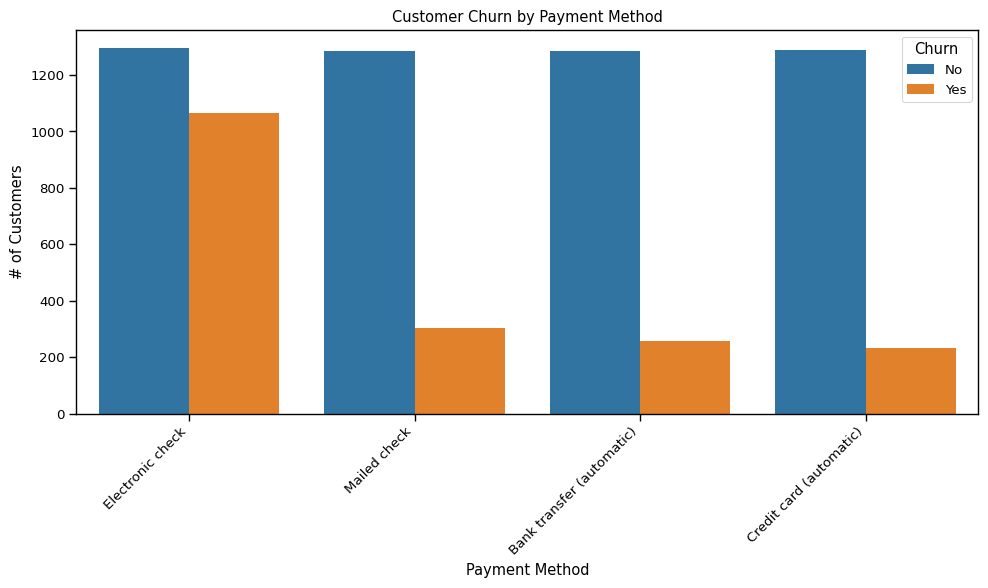

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.countplot(x='PaymentMethod', hue='Churn', data=dataset)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # Rotate labels

# Set labels and title
ax.set_ylabel('# of Customers')
ax.set_xlabel('Payment Method')
ax.set_title('Customer Churn by Payment Method')
ax.legend(title='Churn', loc='best')

plt.tight_layout()
plt.show()

<Figure size 1000x1000 with 0 Axes>

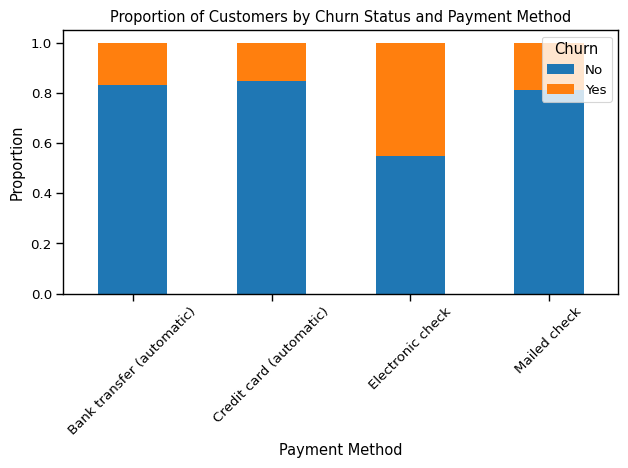

In [ ]:
crosstab = pd.crosstab(dataset['PaymentMethod'], dataset['Churn'])

crosstab_normalized = crosstab.div(crosstab.sum(1).astype(float), axis=0)

plt.figure(figsize=(10, 10))
crosstab_normalized.plot(kind="bar", stacked=True)
plt.title('Proportion of Customers by Churn Status and Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()

# Encoding

In [ ]:
continuous_columns = []
discrete_columns = []

# Iterate through the DataFrame columns to classify them
for column in dataset.columns:
    classification = guess_if_continuous(dataset[column])
    if classification == 'continuous':
        continuous_columns.append(column)
    else:
        discrete_columns.append(column)

# Categorical values with more than 2 labels can be misinterpreted by algorithms as having some sort of hierarchy/order in them
# Therefore we will use Lablel Encoder for binary categorical values and
# One Hot encoder for 2 or more

from sklearn.preprocessing import LabelEncoder

# Sort discrete_columns into binary and non-binary
binary_columns = []
non_binary_columns = []

for column in discrete_columns:
    if dataset[column].nunique() <= 2:
        binary_columns.append(column)
    else:
        non_binary_columns.append(column)

# Make a copy
dataset_encoded = dataset.copy(deep=True)

for column in binary_columns:
    le = LabelEncoder()
    dataset_encoded[column] = le.fit_transform(dataset_encoded[column])

for column in non_binary_columns:
    dummies = pd.get_dummies(dataset_encoded[column], prefix=column, dtype='int')
    dataset_encoded = pd.concat([dataset_encoded, dummies], axis=1)
    dataset_encoded.drop(column, axis=1, inplace=True)

In [ ]:
print(dataset_encoded.dtypes)
print(dataset.shape, dataset_encoded.shape)

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

# Scale Continuous columns

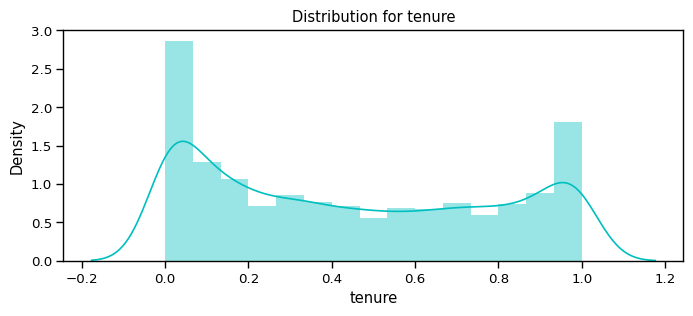

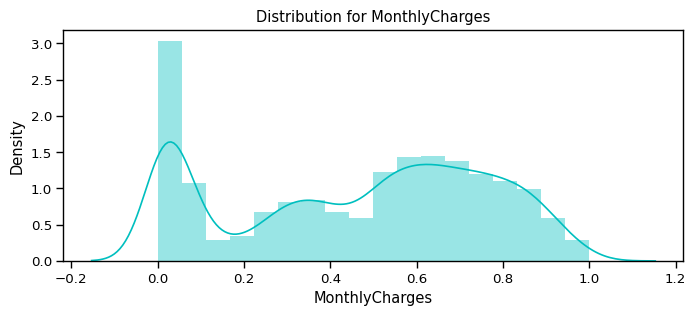

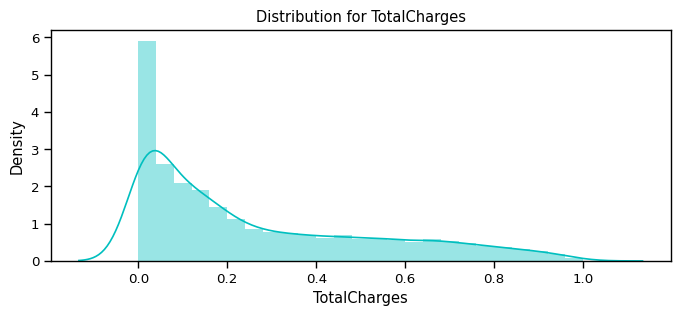

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_std = pd.DataFrame(MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset_encoded[continuous_columns].astype('float64')),
                       columns=continuous_columns)
for feat in continuous_columns: distplot(feat, df_std, color='c')

# Copy dataset
dataset_scaled = dataset_encoded.copy(deep=True)
# Apply scaling to dataset
dataset_scaled[continuous_columns] = MinMaxScaler(feature_range=(0, 1)).fit_transform(dataset_encoded[continuous_columns])

# Feature selection

## Correlation Matrix

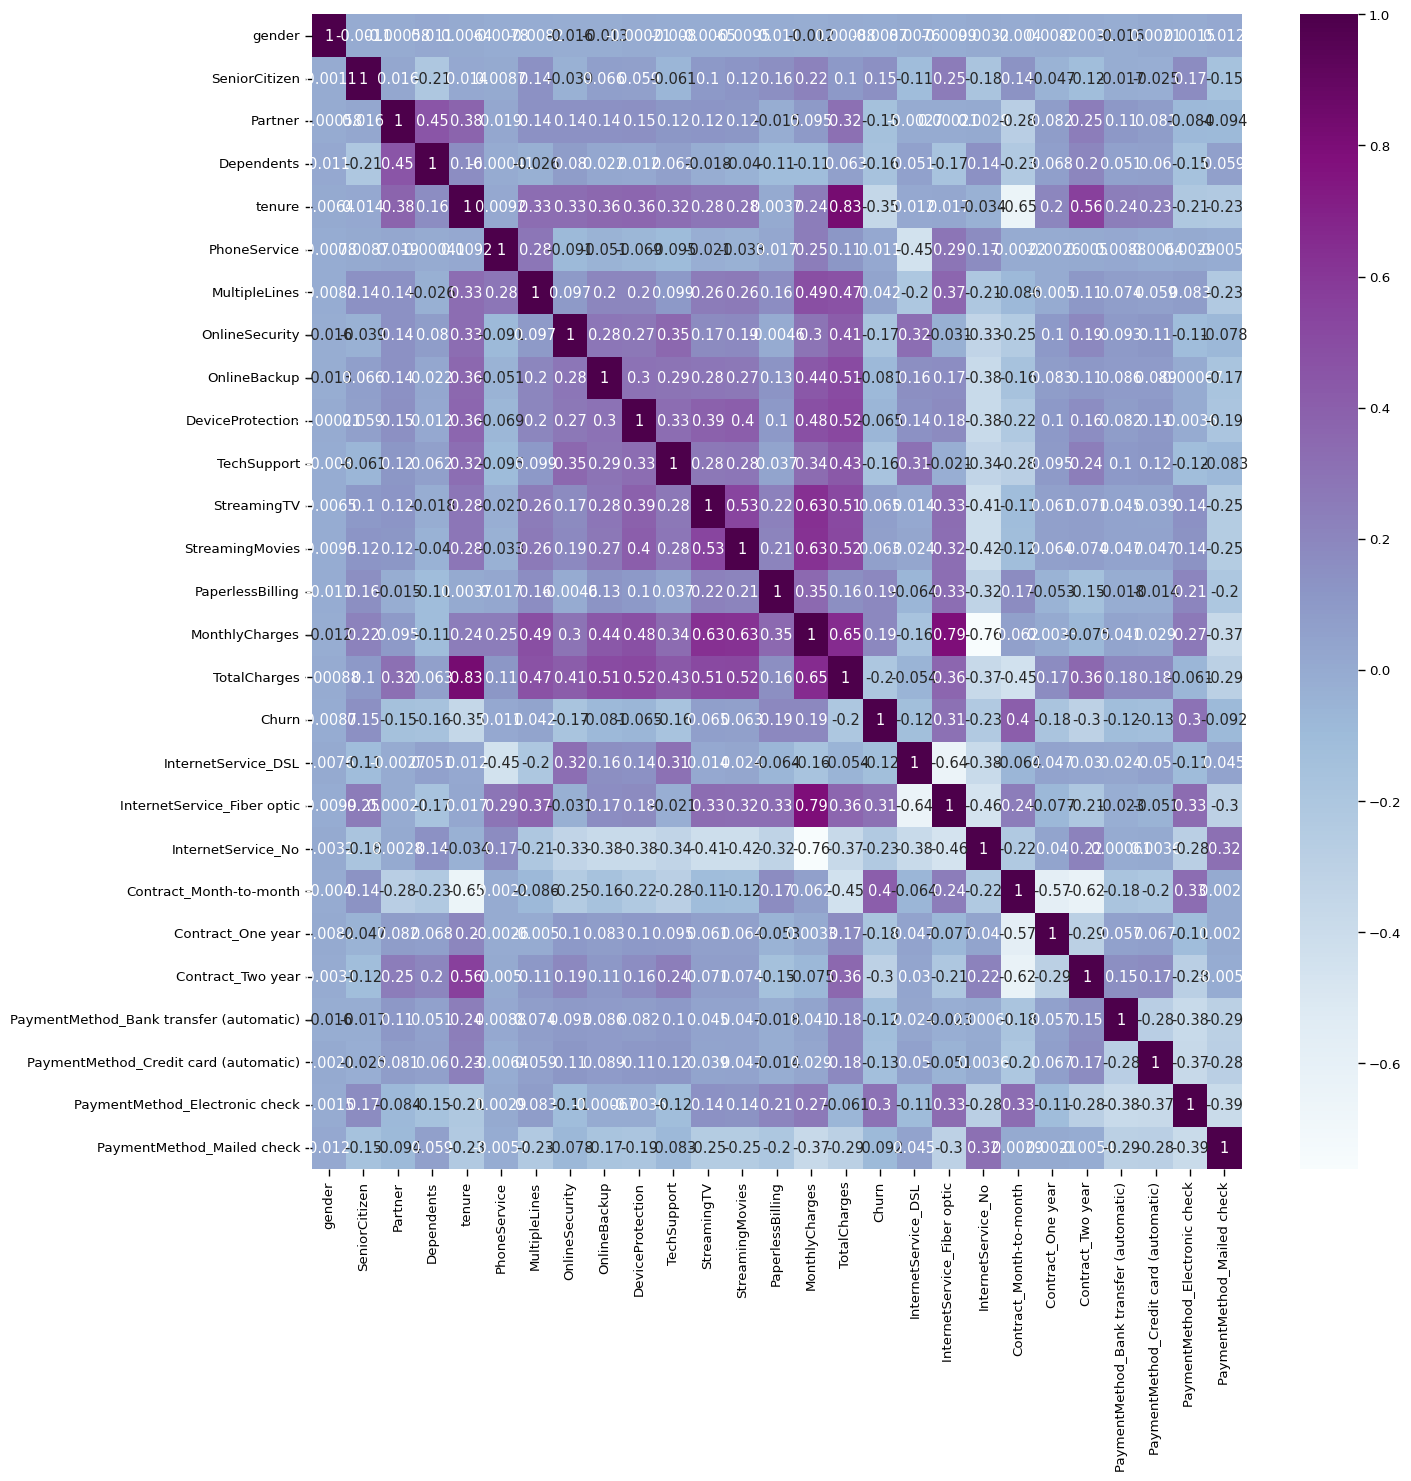

In [ ]:
corr = dataset_scaled.corr() # Returns correlation values
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True, cmap="BuPu")  # Visualise the correlation matrix
plt.show()

Feature Selection for discrete columns

In [ ]:
# Split dataset
X = dataset_scaled.drop(columns = ['Churn'])
y = dataset_scaled['Churn'].values

# Split again for seperate analysis of discrete and cont. values
X_continuous = X[continuous_columns]
X_discrete = X.drop(columns = continuous_columns)

<Axes: title={'center': 'Mutual Information Scores for Discrete Features'}>

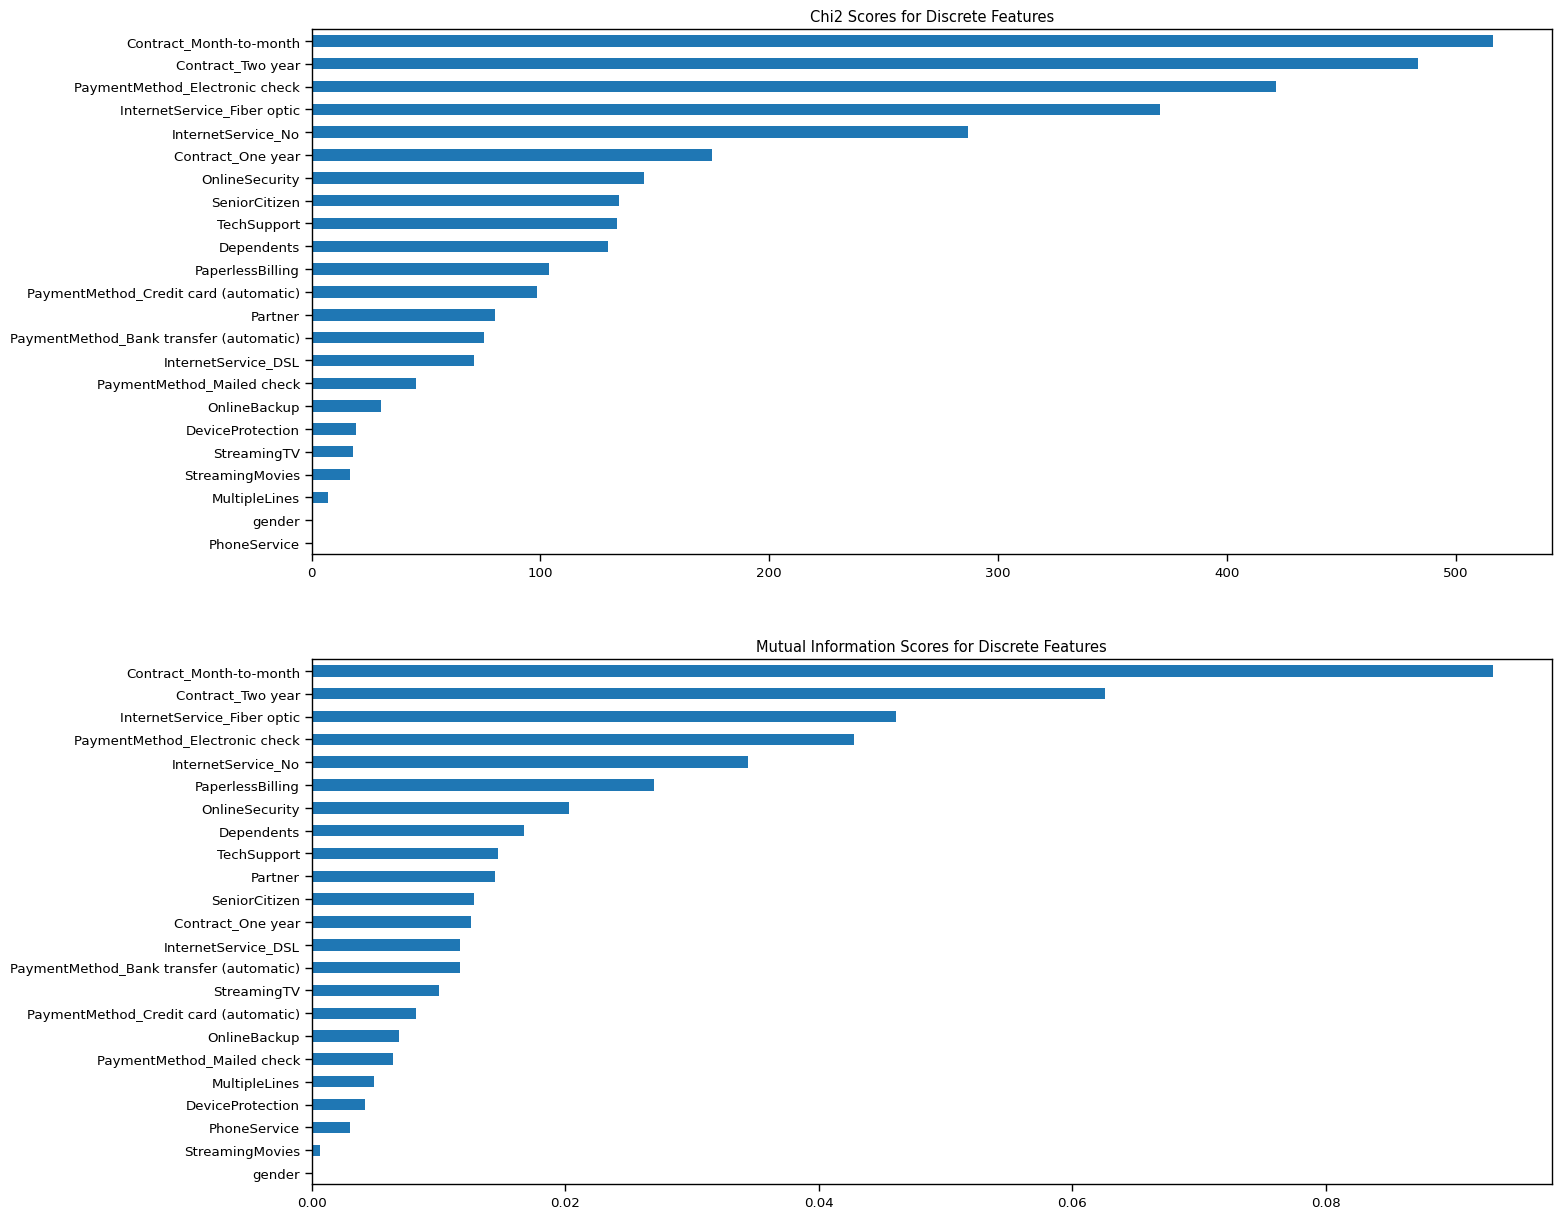

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
# Chi2
chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X_discrete,y)
chi2_sorted = pd.Series(data=chi2.scores_, index=X_discrete.columns).sort_values()

# Mutual Information
mitest = SelectKBest(score_func=lambda X_discrete,y: mutual_info_classif(X_discrete,y, random_state=42), k='all').fit(X_discrete, y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X_discrete.columns).sort_values()
# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 15))
chi2_sorted.plot(kind='barh', ax=axes[0], title='Chi2 Scores for Discrete Features')
mitest_sorted.plot(kind='barh', ax=axes[1], title='Mutual Information Scores for Discrete Features')

Feature Selection for continuous columns

<Axes: title={'center': 'Mutual Information Scores for Continuous Features'}>

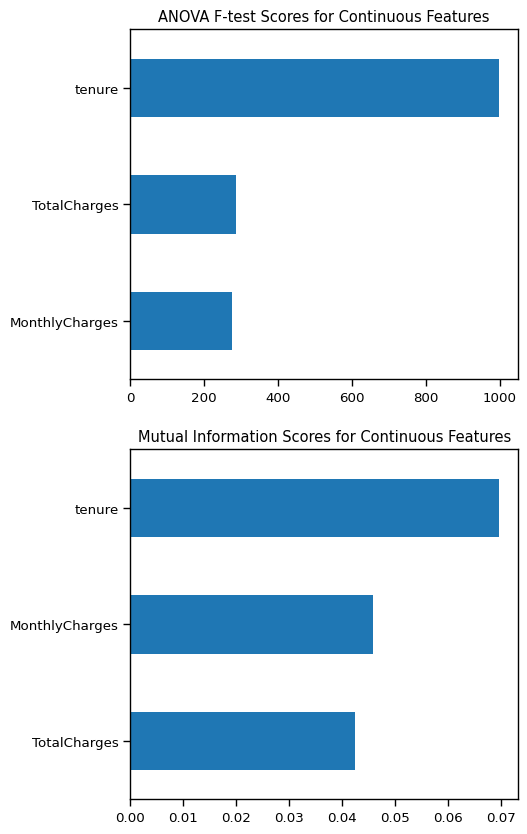

In [ ]:
# ANOVA F-test
ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X_continuous,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X_continuous.columns).sort_values()

# Mutual Information for continuous features

mitest_continuous = SelectKBest(score_func=lambda X_continuous, y: mutual_info_classif(X_continuous, y, random_state=42), k='all').fit(X_continuous, y)
mitest_sorted_continuous = pd.Series(mitest_continuous.scores_, index=X_continuous.columns).sort_values()

# Plot
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))
ftest_sorted.plot(kind='barh', ax=axes[0], title='ANOVA F-test Scores for Continuous Features')
mitest_sorted_continuous.plot(kind='barh', ax=axes[1], title='Mutual Information Scores for Continuous Features')

## ExtraTreesClassifier

<Axes: title={'center': 'Using ExtraTreesClassifier'}>

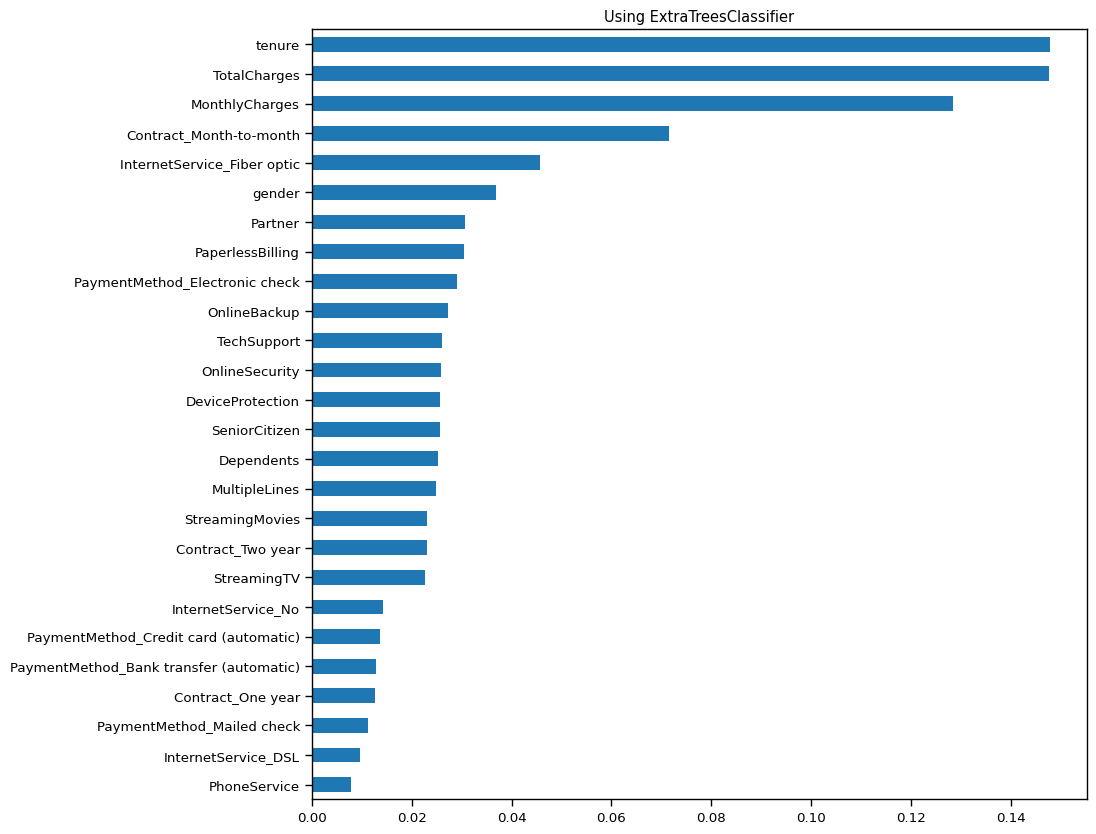

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
# Apply ExtraTreesClassifier
xtrees = ExtraTreesClassifier(random_state=42).fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()
# Plot
xtrees_sorted.plot(kind='barh', title='Using ExtraTreesClassifier', figsize=(10, 10))

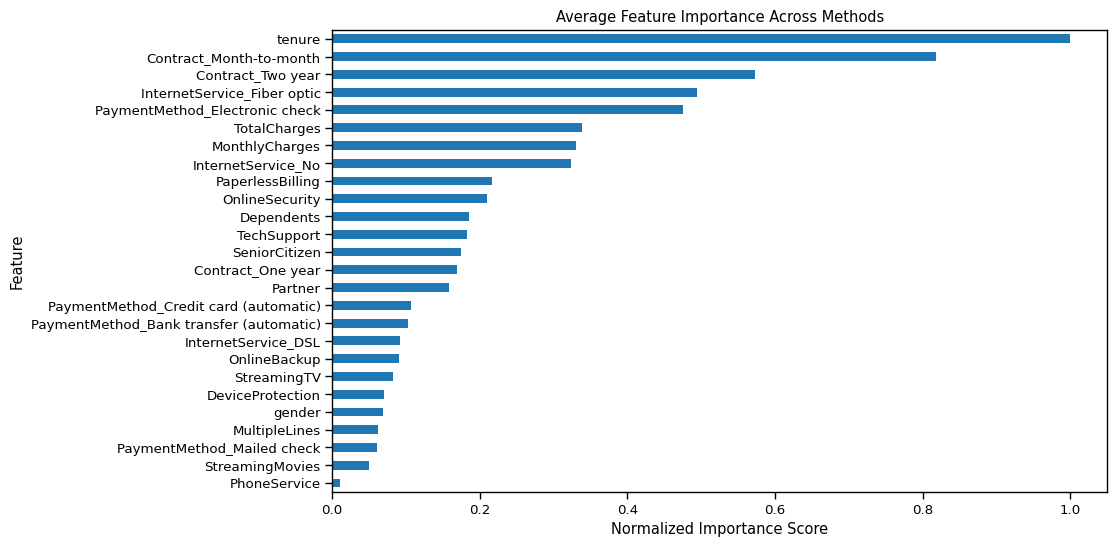

In [ ]:
# Calculate average feature importance from all the tests
# Combine test results into a DataFrame
all_scores = pd.DataFrame({
    'chi2': chi2_sorted,
    'mutual_info_discrete': mitest_sorted,
    'ftest': ftest_sorted,
    'mitest_continuous': mitest_sorted_continuous,
    'xtrees': xtrees_sorted
})

# Normalize scores using Min-Max scaling
scaler = MinMaxScaler()
normalized_scores = pd.DataFrame(scaler.fit_transform(all_scores), columns=all_scores.columns, index=all_scores.index)

# Calculate average importance
normalized_scores['average'] = normalized_scores.mean(axis=1)

# Plot the average feature importance
normalized_scores['average'].sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Average Feature Importance Across Methods')
plt.xlabel('Normalized Importance Score')
plt.ylabel('Feature')

plt.show()

In [ ]:
# Select columns that didnt reach threshold
threshold = 0.15
columns_to_drop = normalized_scores['average'][normalized_scores['average'] < threshold].index
columns_to_drop

# Drop columns
dataset_reduced = dataset_scaled.drop(columns = columns_to_drop)

# View shapes before and after
dataset_scaled.shape, dataset_reduced.shape

((7010, 27), (7010, 16))

# Model Training

In [ ]:
# Split dataset
X_red = dataset_reduced.drop(columns = ['Churn'])
y_red = dataset_reduced['Churn'].values

Trainer and cross validation functions

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


def draw_confusion_matrix(confusion_matrix, model_name):
    sns.heatmap(
        confusion_matrix,
        cmap = 'Blues',
        annot = True,
        fmt = 'g',
        square = True,
        xticklabels = ['No Churn', 'Churn'],
        yticklabels = ['No Churn', 'Churn']
    ).set(
        xlabel = 'Prediction',
        ylabel = 'Actual',
        title = f'{model_name} Confusion Matrix'
    )

model_scores = [] # For storing model scores

def train_test(model, X, y):
  # Split data into sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
  # Fit model
  trained_model = model.fit(X_train, y_train)
  # Make predictions on the test data
  model_pred = trained_model.predict(X_test)
  # Calculate the confusion matrix using y_test and predictions
  model_confusion_matrix = confusion_matrix(y_test, model_pred)
  # Draw the confusion matrix
  draw_confusion_matrix(model_confusion_matrix, f'Model: {type(model).__name__}')
  # Print classification report using y_test and predictions
  print(classification_report(y_test, model_pred, labels=[0,1]))
  # Write model scores
  model_scores.append({
      'Model': type(model).__name__,
      'Accuracy': accuracy_score(y_test, model_pred),
      'Precision': precision_score(y_test, model_pred, average='binary'),
      'Recall': recall_score(y_test, model_pred, average='binary'),
      'F1 Score': f1_score(y_test, model_pred, average='binary')
  })

  return trained_model

def cross_validation(model, X, y, n_splits=5):
  # Cross-validation configuration
  cv = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)
  # Scoring metric
  scoring_metric = 'accuracy'
  # Calculate score
  scores = cross_val_score(model, X, y, cv=cv, scoring=scoring_metric)
  cv_accuracy = scores.mean()

  # Add this to a given model (could probably be done more efficiently)
  for model_score in model_scores:
      if model_score['Model'] == type(model).__name__:
          model_score['CV Accuracy'] = cv_accuracy
          break

  # Print mean scores
  print(f"Mean cross-validation accuracy: {cv_accuracy}")

Train and evaluate 4 models

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.66      0.54      0.59       371

    accuracy                           0.80      1402
   macro avg       0.75      0.72      0.73      1402
weighted avg       0.80      0.80      0.80      1402

Mean cross-validation accuracy: 0.8009985734664765


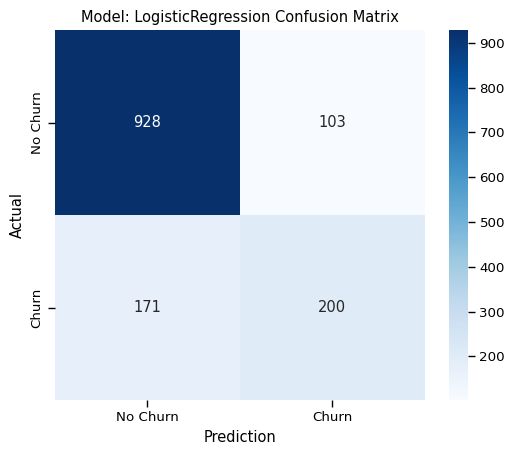

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
train_test(model, X_red, y_red)

# Cross-validation
cross_validation(model, X_red, y_red)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1031
           1       0.58      0.51      0.55       371

    accuracy                           0.77      1402
   macro avg       0.71      0.69      0.70      1402
weighted avg       0.77      0.77      0.77      1402

Mean cross-validation accuracy: 0.7781740370898718


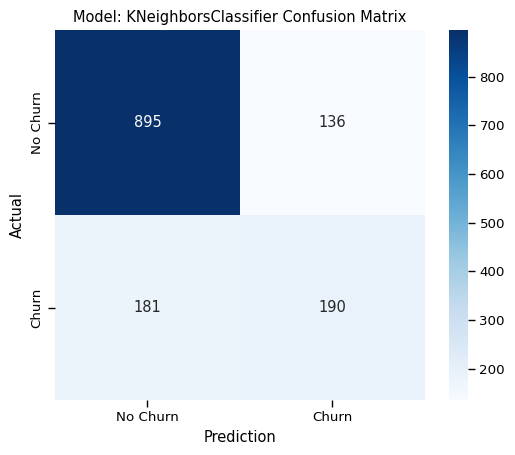

In [ ]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
train_test(model, X_red, y_red)

# Cross-validation
cross_validation(model, X_red, y_red)

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1031
           1       0.48      0.51      0.49       371

    accuracy                           0.72      1402
   macro avg       0.65      0.66      0.65      1402
weighted avg       0.73      0.72      0.73      1402

Mean cross-validation accuracy: 0.7219686162624821


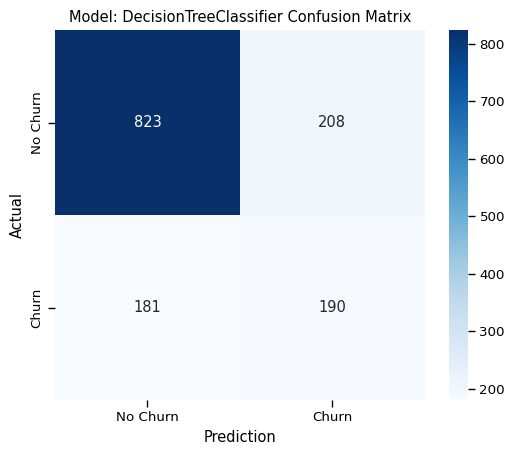

In [ ]:
# D trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
train_test(model, X_red, y_red)

# Cross-validation
cross_validation(model, X_red, y_red)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.66      0.50      0.57       371

    accuracy                           0.80      1402
   macro avg       0.75      0.70      0.72      1402
weighted avg       0.79      0.80      0.79      1402

Mean cross-validation accuracy: 0.7911554921540656


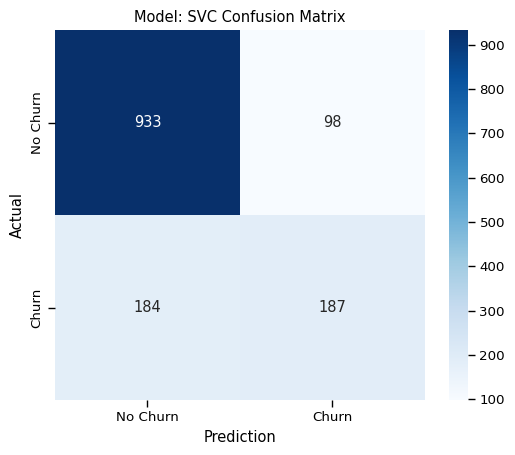

In [ ]:
# SVM
from sklearn.svm import SVC
model = SVC()
train_test(model, X_red, y_red)

# Cross-validation
cross_validation(model, X_red, y_red)

Combine metrics

In [ ]:
# get all metrics together and rank the models
model_scores
score_df = pd.DataFrame(model_scores)
score_df.sort_values(by="CV Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score,CV Accuracy
0,LogisticRegression,0.804565,0.660066,0.539084,0.593472,0.800999
3,SVC,0.798859,0.656140,0.504043,0.570122,0.791155
1,KNeighborsClassifier,0.773894,0.582822,0.512129,0.545194,0.778174
2,DecisionTreeClassifier,0.722539,0.477387,0.512129,0.494148,0.721969
